In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil import parser

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('goldstock v1.csv')
sentiment_df = pd.read_csv('gold-dataset-sinha-khandait.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [7]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [8]:
df.describe()

,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,298.824811,97600.769382,299.118187,301.262244,296.417703
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.set_index('Date', inplace=True)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 1400x700 with 0 Axes>

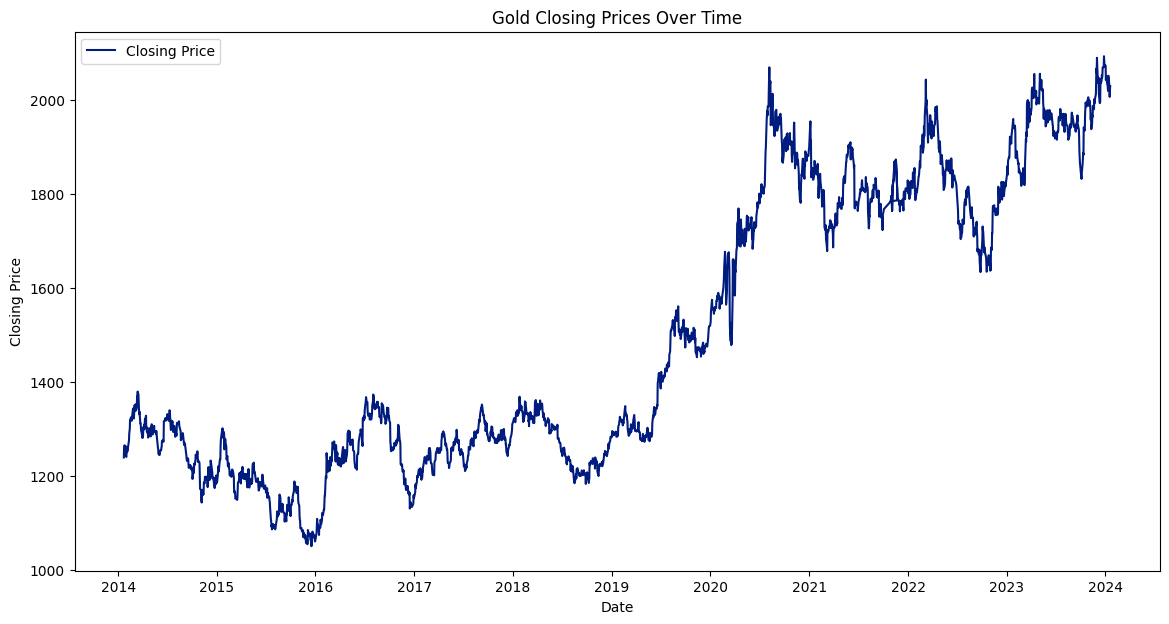

In [12]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

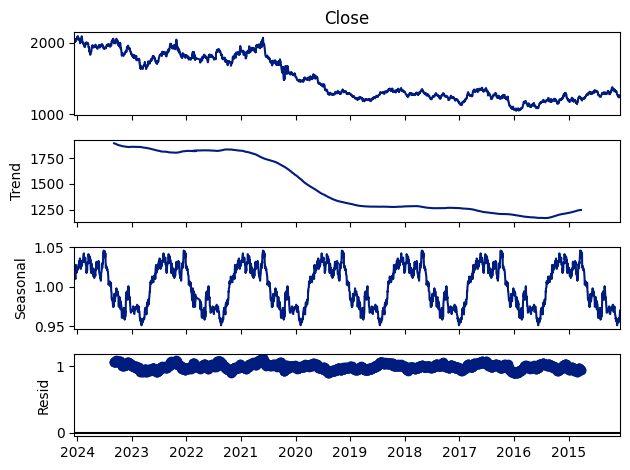

In [13]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train = df['Close'][:int(0.8 * len(df))]
test = df['Close'][int(0.8 * len(df)):]

In [15]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [16]:
forecast = model_fit.forecast(steps=len(test))
test.index = forecast.index

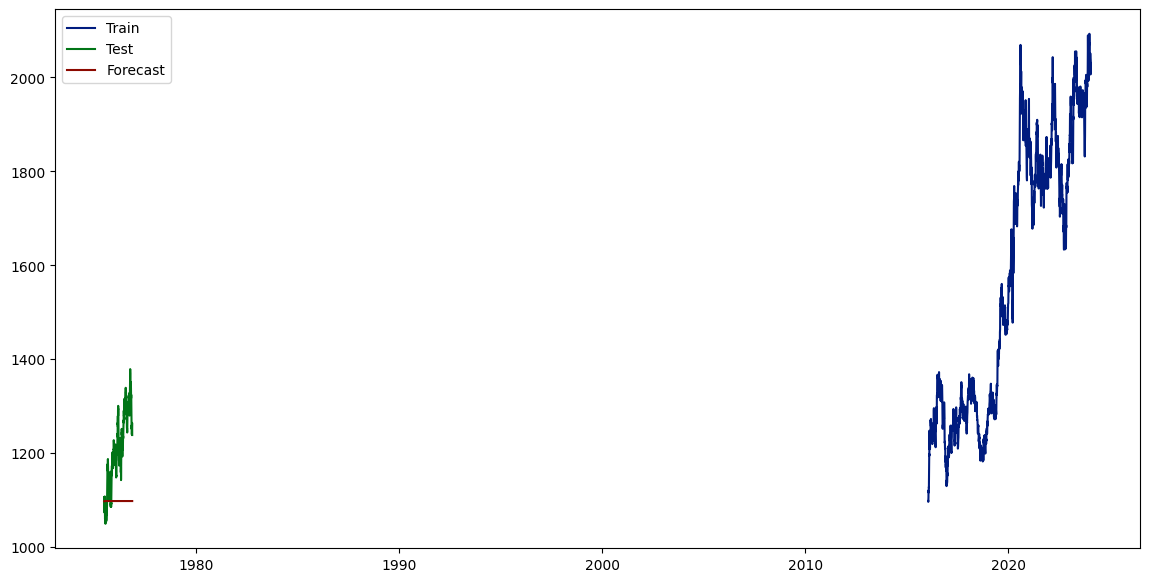

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [18]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 135.8767871192417


In [19]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()



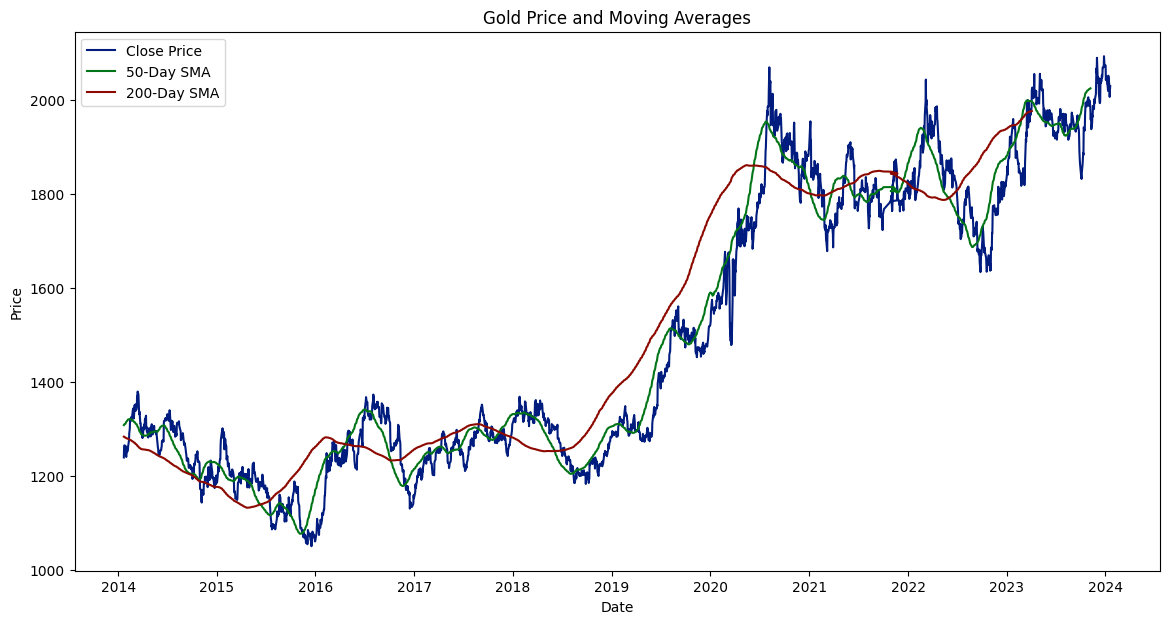

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_50'], label='50-Day SMA')
plt.plot(df['SMA_200'], label='200-Day SMA')
plt.title('Gold Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
df['Signal'] = 0
df['Signal'][50:] = np.where(df['SMA_50'][50:] > df['SMA_200'][50:], 1, 0)
df['Position'] = df['Signal'].diff()

In [23]:
df['Return'] = df['Close'].pct_change()
df['Strategy_Return'] = df['Return'] * df['Position'].shift(1)

In [24]:
df['Cumulative_Return'] = (1 + df['Return']).cumprod() - 1
df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod() - 1

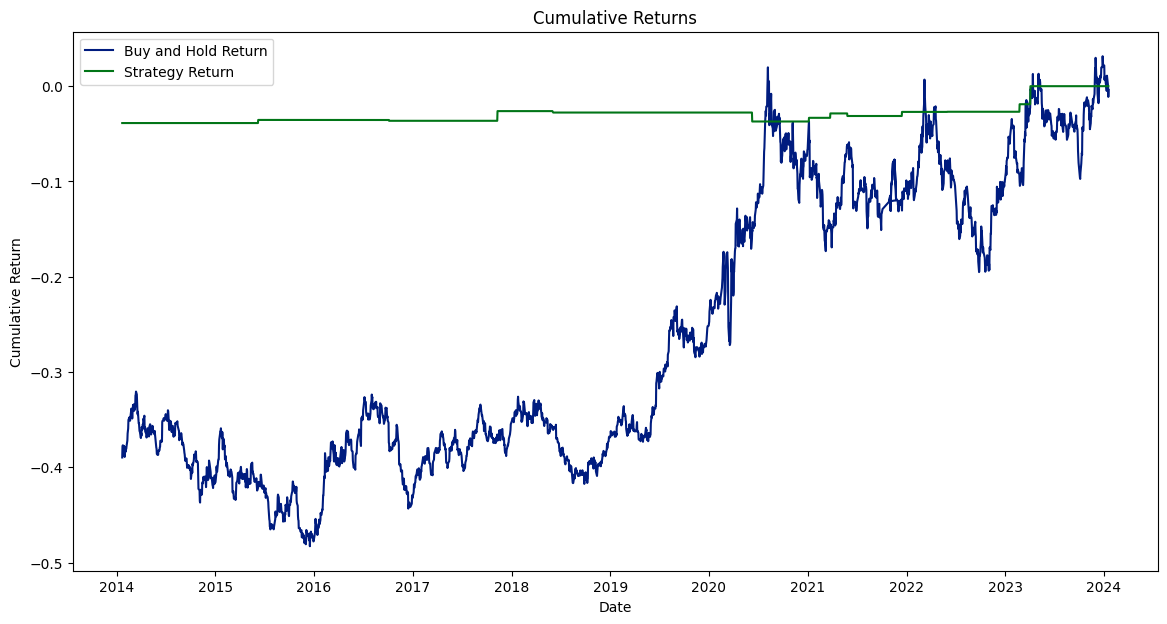

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(df['Cumulative_Return'], label='Buy and Hold Return')
plt.plot(df['Cumulative_Strategy_Return'], label='Strategy Return')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [26]:
total_return = df['Cumulative_Strategy_Return'][-1]
sharpe_ratio = df['Strategy_Return'].mean() / df['Strategy_Return'].std() * np.sqrt(252)

print(f'Total Return: {total_return}')
print(f'Sharpe Ratio: {sharpe_ratio}')

Total Return: -0.038693744239367334
Sharpe Ratio: -0.4658423977728557


In [27]:
sentiment_df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


In [28]:
sentiment_df.columns

Index(['Dates', 'URL', 'News', 'Price Direction Up',
       'Price Direction Constant', 'Price Direction Down', 'Asset Comparision',
       'Past Information', 'Future Information', 'Price Sentiment'],
      dtype='object')

In [31]:
def parse_date(date_str):
    if pd.isnull(date_str):  # Handle NaT (Not a Time) values
        return None
    try:
        return parser.parse(date_str)
    except Exception as e:
        print(f"Error parsing date: {date_str} - {e}")
        return None

# Apply the parse_date function to the 'Dates' column
sentiment_df['Dates'] = sentiment_df['Dates'].apply(parse_date)

# Check for unparseable dates again
unparsed_dates = sentiment_df[sentiment_df['Dates'].isnull()]
if not unparsed_dates.empty:
    print("Unparseable dates found after custom parsing:")
    print(unparsed_dates)
else:
    print("All dates parsed successfully after custom parsing.")

# Set 'Dates' as the index
sentiment_df.set_index('Dates', inplace=True)

KeyError: 'Dates'

In [32]:
sentiment_df.reset_index()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,2016-01-28 00:00:00,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,2017-09-13 00:00:00,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,2016-07-26 00:00:00,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,2018-02-28 00:00:00,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,2017-06-09 00:00:00,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,2013-07-01 00:00:00,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,2018-09-27 00:00:00,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,2017-03-03 00:00:00,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,2008-11-06 00:00:00,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [33]:
merged_df = df.merge(sentiment_df, left_index=True, right_index=True)
merged_df.columns

Index(['Close', 'Volume', 'Open', 'High', 'Low', 'SMA_50', 'SMA_200', 'Signal',
       'Position', 'Return', 'Strategy_Return', 'Cumulative_Return',
       'Cumulative_Strategy_Return', 'URL', 'News', 'Price Direction Up',
       'Price Direction Constant', 'Price Direction Down', 'Asset Comparision',
       'Past Information', 'Future Information', 'Price Sentiment'],
      dtype='object')

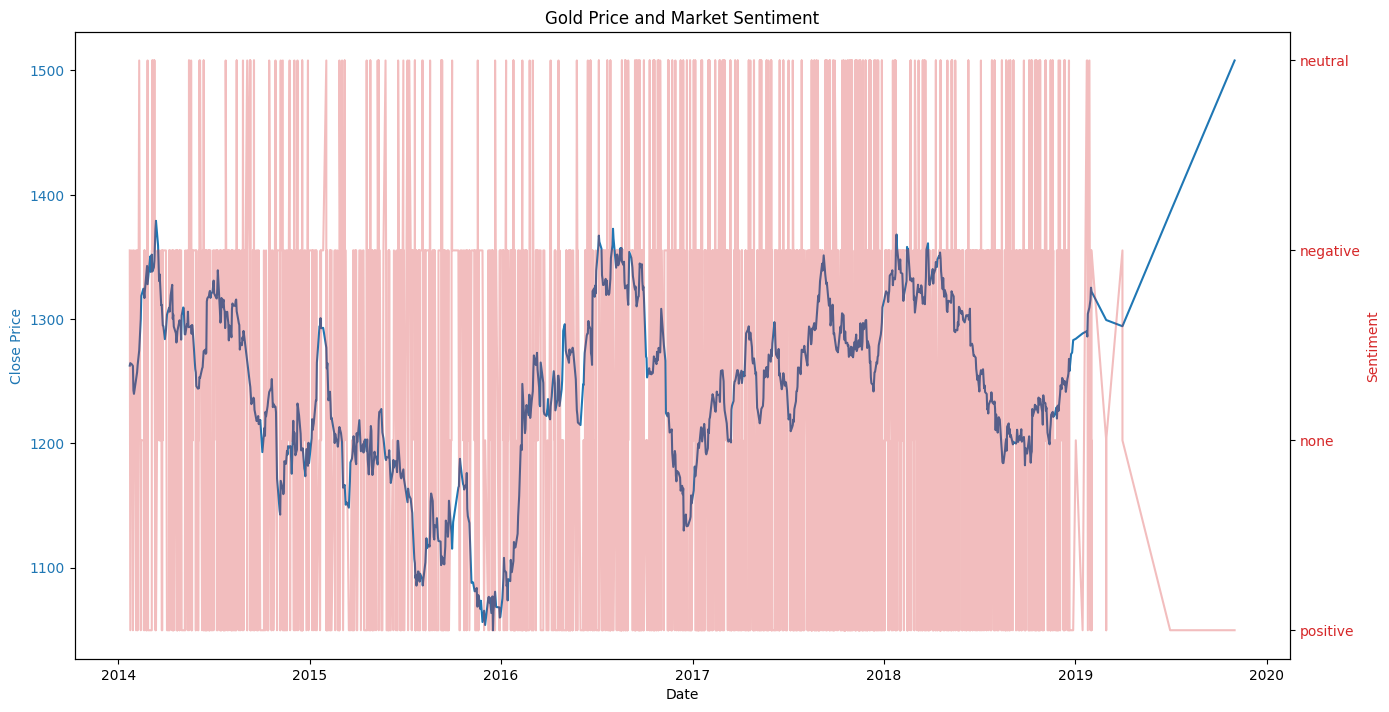

In [34]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(merged_df.index, merged_df['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment', color='tab:red')
ax2.plot(merged_df.index, merged_df['Price Sentiment'], color='tab:red', label='Sentiment', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Gold Price and Market Sentiment')
plt.show()